# Agregações e operações em grupos - Parte 2

# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [292]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [294]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [295]:
var_num = sinasc_raw.select_dtypes('number')
print(var_num.columns)
var_num

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES', 'CONSULTAS',
       'HORANASC', 'APGAR1', 'APGAR5', 'PESO', 'IDANOMAL', 'NUMEROLOTE',
       'DIFDATA', 'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU',
       'ESCMAE2010', 'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT',
       'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC',
       'TPMETESTIM', 'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART',
       'STCESPARTO', 'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC',
       'ESCMAEAGR1', 'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON',
       'PARIDADE', 'KOTELCHUCK', 'CONTADOR', 'munResLat', 'munResLon',
       'munResAlt', 'munResArea'],
      dtype='object')


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,...,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,NaN,0.0,0.0,110001,...,1,1,1,0,5,1,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,999992.0,1.0,0.0,110001,...,1,1,5,1,5,2,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,513205.0,2.0,0.0,110001,...,1,1,7,1,5,3,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,231205.0,0.0,0.0,110037,...,1,1,2,0,4,4,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,999992.0,1.0,0.0,110001,...,1,1,5,1,5,5,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,333115.0,1.0,0.0,110030,...,1,1,7,1,5,2767632,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,999992.0,0.0,0.0,110092,...,1,1,1,0,5,2772678,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,421125.0,0.0,1.0,110030,...,1,1,3,1,5,2776905,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,999992.0,1.0,0.0,110030,...,1,1,10,1,5,2777105,-12.74137,-60.13858,595.0,11518.915


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [298]:
# Dataframe do município com sua latitude
lat_mun = sinasc_raw[['munResLat', 'QTDPARTNOR', 'QTDPARTCES']]
lat_mun.head(2)


,munResLat,QTDPARTNOR,QTDPARTCES
0,-11.93554,0.0,0.0
1,-11.93554,0.0,1.0


In [299]:
# Definindo as faixas

# Latitude >= -10.5

faixa1 = lat_mun[lat_mun.munResLat >= -10.5].munResLat.unique()
faixa1

array([ -9.90846,  -9.37819,  -9.71667, -10.2631 , -10.43595,  -9.70554,
        -8.76889, -10.33887,  -9.19187, -10.20981,  -9.85139,  -8.78502,
        -9.42556, -10.41177, -10.24873, -10.43105])

In [300]:
# Latitude < -10.5

faixa2 = lat_mun[lat_mun['munResLat'] < -10.5]['munResLat'].unique()
faixa2

array([-11.93554, -12.13178, -11.70974, -11.72226, -11.91439, -10.88205,
       -12.74137, -12.43601, -10.56842, -13.13056, -11.12855, -10.72357,
       -12.99752, -11.69949, -10.61207, -11.90842, -11.67754, -11.04561,
       -13.19503, -11.17321, -11.43387, -12.17983, -11.52855, -12.0638 ,
       -11.19624, -11.72133, -11.34413, -11.82571, -11.76712, -11.42684,
       -12.55684, -10.77388, -10.91553, -10.93217, -13.47656, -13.49976])

In [301]:
# Definindo a coluna index

lat_mun = lat_mun.set_index('munResLat')

In [302]:
# Definindo o mapeamento

mapping = {
    -9.90846: 'faixa1',  
    -9.37819: 'faixa1',  
    -9.71667: 'faixa1', 
    -10.2631: 'faixa1' , 
    -10.43595: 'faixa1',  
    -9.70554: 'faixa1',        
    -8.76889: 'faixa1', 
    -10.33887: 'faixa1',  
    -9.19187: 'faixa1', 
    -10.20981: 'faixa1',  
    -9.85139: 'faixa1',  
    -8.78502: 'faixa1',        
    -9.42556: 'faixa1', 
    -10.41177: 'faixa1', 
    -10.24873: 'faixa1', 
    -10.43105: 'faixa1',

    -11.93554: 'faixa2', 
    -12.13178: 'faixa2', 
    -11.70974: 'faixa2', 
    -11.72226: 'faixa2', 
    -11.91439: 'faixa2', 
    -10.88205: 'faixa2',       
    -12.74137: 'faixa2', 
    -12.43601: 'faixa2', 
    -10.56842: 'faixa2', 
    -13.13056: 'faixa2', 
    -11.12855: 'faixa2', 
    -10.72357: 'faixa2',       
    -12.99752: 'faixa2', 
    -11.69949: 'faixa2', 
    -10.61207: 'faixa2', 
    -11.90842: 'faixa2', 
    -11.67754: 'faixa2', 
    -11.04561: 'faixa2',       
    -13.19503: 'faixa2', 
    -11.17321: 'faixa2', 
    -11.43387: 'faixa2', 
    -12.17983: 'faixa2', 
    -11.52855: 'faixa2', 
    -12.0638: 'faixa2',       
    -11.19624: 'faixa2', 
    -11.72133: 'faixa2', 
    -11.34413: 'faixa2', 
    -11.82571: 'faixa2', 
    -11.76712: 'faixa2', 
    -11.42684: 'faixa2',       
    -12.55684: 'faixa2', 
    -10.77388: 'faixa2', 
    -10.91553: 'faixa2', 
    -10.93217: 'faixa2', 
    -13.47656: 'faixa2', 
    -13.49976: 'faixa2'

}

In [303]:
lat_mun.groupby(mapping).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

QTDPARTNOR                                                  \
                 sum      mean  min   max median       std       var   
munResLat                                                              
faixa1        8771.0  0.711759  0.0  40.0    0.0  1.279042  1.635949   
faixa2        5800.0  0.452242  0.0  41.0    0.0  1.123426  1.262087   

          QTDPARTCES                                                  
                 sum      mean  min   max median       std       var  
munResLat                                                             
faixa1        6041.0  0.487335  0.0  12.0    0.0  0.737899  0.544495  
faixa2        7095.0  0.552570  0.0  12.0    0.0  0.753036  0.567062

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [305]:
# Dataframe do associado a área

area_mun = sinasc_raw[['munResArea', 'QTDPARTNOR', 'QTDPARTCES']]
area_mun.head(4)

,munResArea,QTDPARTNOR,QTDPARTCES
0,7067.025,0.0,0.0
1,7067.025,0.0,1.0
2,7067.025,1.0,1.0
3,3958.273,0.0,0.0


In [306]:
# Valores para a faixa acima de 3000

area_mun[area_mun.munResArea >= 3000]['munResArea'].unique()

array([ 7067.025,  3958.273,  4426.571,  3863.943, 34096.394,  4081.583,
        6896.648,  3265.809, 11518.915,  3135.106,  6843.868,  4987.177,
        3442.005,  8509.27 , 10071.643,  3060.321,  7460.219,  5067.384,
        6240.932,  3792.998,  4518.035, 10959.767,  3029.189,  3773.505,
        5126.723, 24855.724,  6014.733])

In [307]:
# Valores para a faixa abaixo de 3000

area_mun[area_mun.munResArea < 3000].munResArea.unique()

array([ 843.446, 1457.888,  541.647, 2651.822, 1931.378, 2944.128,
       1717.64 , 1961.778, 1451.06 ,  831.857, 1969.85 , 1197.796,
       1191.875, 2783.3  , 1758.465, 2548.683,  798.083, 1703.008,
        605.692,  892.842, 2197.413,  807.126,  459.978,  965.676,
       1314.352])

In [308]:
# Mapeando as faixas

map = {
    843.446: 'area1', 
    1457.888: 'area1',  
    541.647: 'area1', 
    2651.822: 'area1', 
    1931.378: 'area1', 
    2944.128: 'area1',       
    1717.64: 'area1', 
    1961.778: 'area1', 
    1451.06: 'area1',  
    831.857: 'area1', 
    1969.85: 'area1', 
    1197.796: 'area1',       
    1191.875: 'area1', 
    2783.3: 'area1', 
    1758.465: 'area1', 
    2548.683: 'area1',  
    798.083: 'area1', 
    1703.008: 'area1',        
    605.692: 'area1',  
    892.842: 'area1', 
    2197.413: 'area1',  
    807.126: 'area1',  
    459.978: 'area1',  
    965.676: 'area1',       
    1314.352: 'area1', 

    7067.025: 'area2',  
    3958.273: 'area2',  
    4426.571: 'area2',  
    3863.943: 'area2', 
    34096.394: 'area2',  
    4081.583: 'area2',        
    6896.648: 'area2',  
    3265.809: 'area2', 
    11518.915: 'area2',         
    3135.106: 'area2',  
    6843.868: 'area2',  
    4987.177: 'area2',        
    3442.005: 'area2',  
    8509.27 : 'area2', 
    10071.643: 'area2',  
    3060.321: 'area2',  
    7460.219: 'area2',  
    5067.384: 'area2',        
    6240.932: 'area2',  
    3792.998: 'area2',  
    4518.035: 'area2', 
    10959.767: 'area2', 
    3029.189: 'area2',  
    3773.505: 'area2',        
    5126.723: 'area2', 
    24855.724: 'area2',  
    6014.733: 'area2'
}

In [309]:
# Definindo a coluna index

area_mun = area_mun.set_index('munResArea')

In [310]:
area_mun.groupby(map).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

QTDPARTNOR                                                  \
                  sum      mean  min   max median       std       var   
munResArea                                                              
area1          1912.0  0.371334  0.0  10.0    0.0  0.856441  0.733490   
area2         12659.0  0.632982  0.0  41.0    0.0  1.278932  1.635668   

           QTDPARTCES                                                  
                  sum      mean  min   max median       std       var  
munResArea                                                             
area1          2952.0  0.572981  0.0   5.0    0.0  0.749368  0.561553  
area2         10184.0  0.507070  0.0  12.0    0.0  0.744981  0.554997

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [312]:
# Definindo o dataframe

alt_mun = sinasc_raw[['munResAlt', 'QTDPARTNOR', 'QTDPARTCES']]
alt_mun.head()

,munResAlt,QTDPARTNOR,QTDPARTCES
0,338.0,0.0,0.0
1,338.0,0.0,1.0
2,338.0,1.0,1.0
3,397.0,0.0,0.0
4,338.0,0.0,1.0


In [313]:
# Definindo faixas arbitrárias com base no método .qcut

faixa_alt = pd.qcut(alt_mun['munResAlt'], 3)
faixa_alt

0        (177.0, 595.0]
1        (177.0, 595.0]
2        (177.0, 595.0]
3        (177.0, 595.0]
4        (177.0, 595.0]
              ...      
27023    (177.0, 595.0]
27024    (177.0, 595.0]
27025    (177.0, 595.0]
27026    (177.0, 595.0]
27027    (177.0, 595.0]
Name: munResAlt, Length: 27028, dtype: category
Categories (3, interval[float64, right]): [(84.999, 111.0] < (111.0, 177.0] < (177.0, 595.0]]

In [314]:
# Tratando a coluna 'munResAlt'
alt_mun2 = alt_mun.drop(columns=['munResAlt'])

#  Aplicando o grupby
alt_mun2.groupby(faixa_alt, observed=False).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

QTDPARTNOR                                                  \
                       sum      mean  min   max median       std       var   
munResAlt                                                                    
(84.999, 111.0]     6271.0  0.802534  0.0  40.0    0.0  1.377551  1.897646   
(111.0, 177.0]      5336.0  0.574319  0.0  14.0    0.0  1.139346  1.298109   
(177.0, 595.0]      2964.0  0.368519  0.0  41.0    0.0  1.065716  1.135751   

                QTDPARTCES                                                  
                       sum      mean  min   max median       std       var  
munResAlt                                                                   
(84.999, 111.0]     3522.0  0.451654  0.0  12.0    0.0  0.736842  0.542936  
(111.0, 177.0]      4788.0  0.510611  0.0  12.0    0.0  0.744376  0.554095  
(177.0, 595.0]      4826.0  0.598685  0.0   5.0    0.0  0.750578  0.563368

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [316]:
# O dataframe
df = sinasc_raw[['IDADEMAE', 'munResNome', 'DTNASC']]
df.head()
# sinasc_raw.columns

,IDADEMAE,munResNome,DTNASC
0,19,Alta Floresta D'Oeste,2019-02-19
1,29,Alta Floresta D'Oeste,2019-02-21
2,37,Alta Floresta D'Oeste,2019-02-25
3,30,Alto Alegre dos Parecis,2019-03-20
4,30,Alta Floresta D'Oeste,2019-03-23


In [317]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

Text(0, 0.5, 'idade mae')

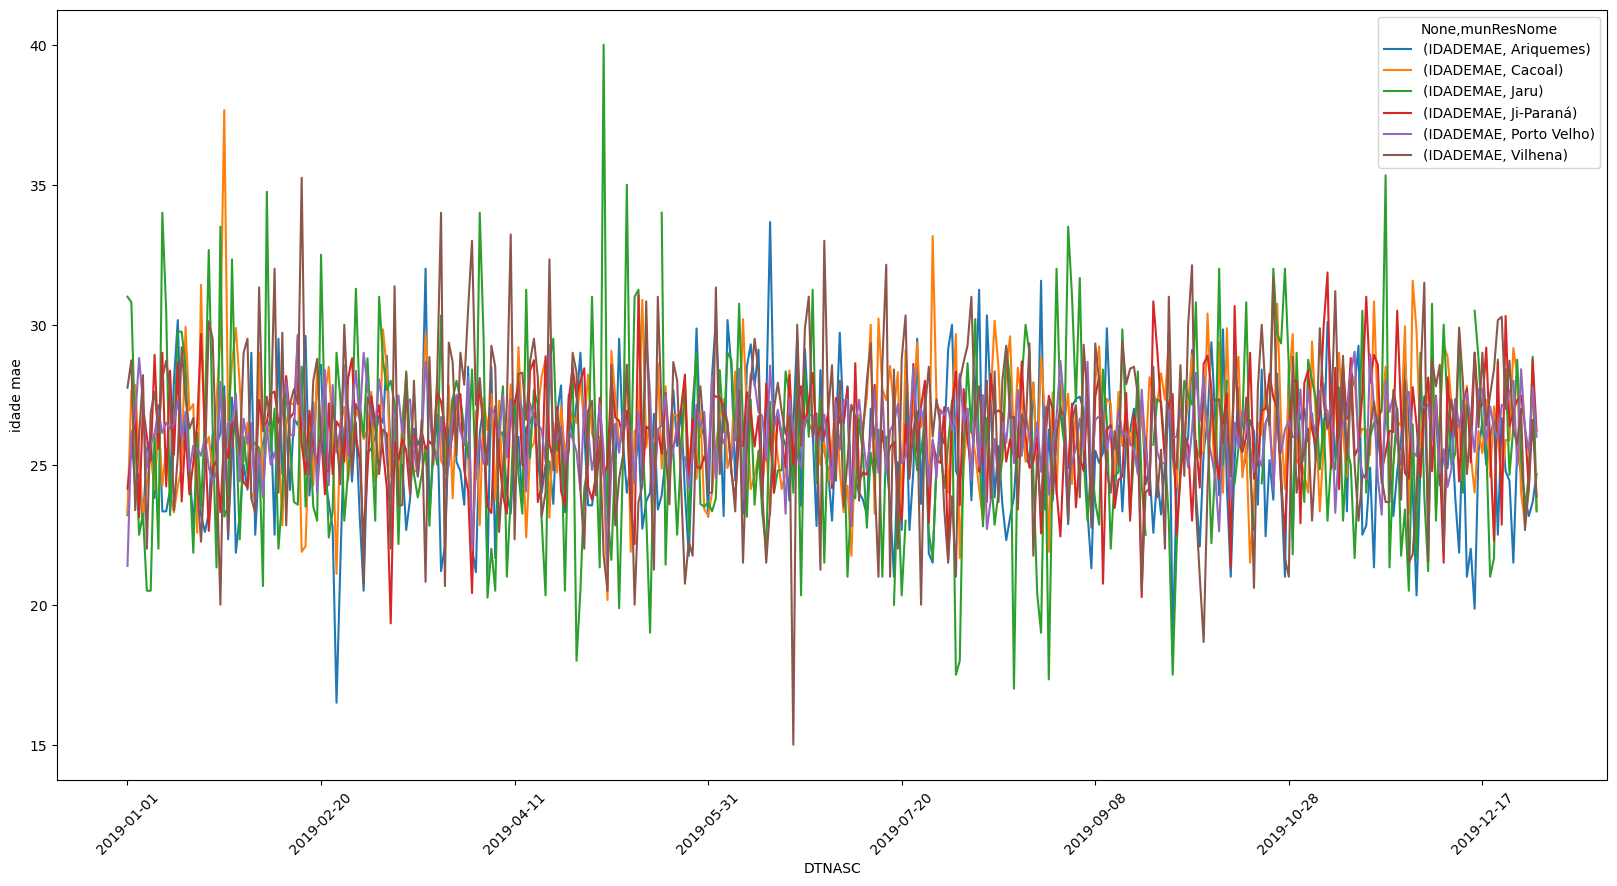

In [318]:
# Definindo o index
df2 = df.set_index('munResNome')

# Aplicando o groupby e gerando o gráfico
df2.groupby(['DTNASC', imediatas]).mean().unstack().plot(figsize=[20, 10])

plt.tick_params(axis='x', rotation=45)
plt.ylabel('idade mae')

In [319]:
# Groupby result
df2.groupby(['DTNASC', imediatas]).mean().unstack()

IDADEMAE                                                        
munResNome  Ariquemes     Cacoal       Jaru  Ji-Paraná Porto Velho    Vilhena
DTNASC                                                                       
2019-01-01  23.200000  23.250000  31.000000  24.142857   21.388889  27.750000
2019-01-02  26.166667  27.666667  30.800000  25.545455   26.050000  28.727273
2019-01-03  24.142857  27.846154  26.000000  27.000000   26.638889  23.375000
2019-01-04  24.666667  25.230769  22.500000  23.125000   28.814815  26.000000
2019-01-05  22.888889  23.200000  23.250000  27.100000   27.250000  28.200000
...               ...        ...        ...        ...         ...        ...
2019-12-27  24.666667  24.000000  25.333333  27.466667   28.410256  27.000000
2019-12-28  23.833333  22.888889  23.333333  26.375000   26.291667  22.666667
2019-12-29  23.166667  24.100000  24.666667  24.125000   25.470588  24.250000
2019-12-30  23.666667  28.437500  28.857143  28.750000   27.777778  26.600000
2019-12-31  24.666667  23.400000  23.333333  26.200000   26.000000  23.857143

[365 rows x 6 columns]

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH

*O Índice de Desenvolvimento Humano varia de 0 até 1, e nesta lista é dividido em cinco categorias: IDH muito alto (0,800 – 1,000), IDH alto (0,700 – 0,799), IDH médio (0,600 0,699), IDH baixo (0,500 – 0,599) e IDH muito baixo (0,000 – 0,499).*

A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [322]:
# Carregando um conjunto de dados com os índices, IDH

df = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')
df.head()

,municipio,regiao,idh,ifdm,pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
4,Ariquemes,Ariquemes,0.702,0.7746,2579830


In [323]:
# Obtendo as variáveis de interesse para o problema em questão

df_idh = df[['municipio', 'idh']]
df_idh.head()

,municipio,idh
0,Alta Floresta D'Oeste,0.641
1,Alto Alegre dos Parecis,0.592
2,Alto Paraíso,0.625
3,Alvorada D'Oeste,0.643
4,Ariquemes,0.702


In [324]:
# Gerando as faixas com os IDHs

idh_faixa = pd.cut(df_idh['idh'], [0, 0.499, 0.599, 0.699, 0.799, 1.000],
                   labels=['IDH muito baixo (0,000 – 0,499)', 'IDH baixo (0,500 – 0,599)', 'IDH médio (0,600 0,699)', 
                             'IDH alto (0,700 – 0,799)', 'IDH muito alto (0,800 – 1,000)'])

idh_faixa.value_counts().to_frame()

,count
idh,
"IDH médio (0,600 0,699)",36
"IDH baixo (0,500 – 0,599)",9
"IDH alto (0,700 – 0,799)",7
"IDH muito baixo (0,000 – 0,499)",0
"IDH muito alto (0,800 – 1,000)",0


Aqui obteve-se a relação decrescente da posição dos municípios de Rondônia em relação ao IDH. Como é possível notar, não há municípios com *IDH muito alto* e com *IDH muito baixo*, sendo a maior concentração em *IDH médio*.

In [326]:
# Renomeando as colunas para aplicação do .merge
df_idh.columns = ['munResNome', 'idh']
df_idh.head()

,munResNome,idh
0,Alta Floresta D'Oeste,0.641
1,Alto Alegre dos Parecis,0.592
2,Alto Paraíso,0.625
3,Alvorada D'Oeste,0.643
4,Ariquemes,0.702


In [327]:
# Unindo os dataframe de interesse 

df_merged = df_idh.merge(sinasc_raw, on='munResNome', how='inner')
df_merged.head()

,munResNome,idh,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
0,Alta Floresta D'Oeste,0.641,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,...,0,5,1,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,Alta Floresta D'Oeste,0.641,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,...,1,5,2,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,Alta Floresta D'Oeste,0.641,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,...,1,5,3,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,Alta Floresta D'Oeste,0.641,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,...,1,5,5,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
4,Alta Floresta D'Oeste,0.641,1,2516500.0,110001,1,33,5.0,1 a 3 anos,621005.0,...,1,5,6,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [328]:
# Realização algumas análises em relação a idade da mãe e do pai

idh_mae_pai = df_merged.groupby(['munResNome', 'idh'])[['IDADEMAE', 'IDADEPAI']].mean()
idh_mae_pai.head()

,,IDADEMAE,IDADEPAI
munResNome,idh,,
Alta Floresta D'Oeste,0.641,25.991826,29.548701
Alto Alegre dos Parecis,0.592,24.844156,29.179104
Alto Paraíso,0.625,24.960177,28.833333
Alvorada D'Oeste,0.643,25.770732,30.757282
Ariquemes,0.702,25.607866,32.466667


In [329]:
idh_mae_pai = idh_mae_pai.reset_index()

In [330]:
idh_mae_pai.head()

,munResNome,idh,IDADEMAE,IDADEPAI
0,Alta Floresta D'Oeste,0.641,25.991826,29.548701
1,Alto Alegre dos Parecis,0.592,24.844156,29.179104
2,Alto Paraíso,0.625,24.960177,28.833333
3,Alvorada D'Oeste,0.643,25.770732,30.757282
4,Ariquemes,0.702,25.607866,32.466667


Text(0, 0.5, 'idh')

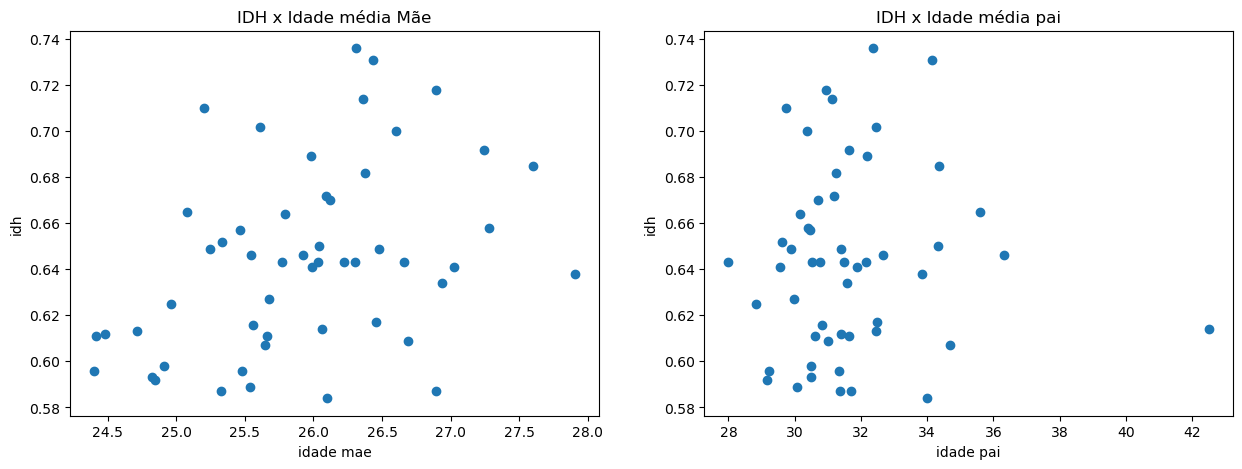

In [331]:
fig = plt.figure(figsize=[15,5])

ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax.scatter(idh_mae_pai['IDADEMAE'], idh_mae_pai['idh'])
ax2.scatter(idh_mae_pai['IDADEPAI'], idh_mae_pai['idh'])

ax.set_xlabel('idade mae')
ax.set_ylabel('idh')
ax.set_title('IDH x Idade média Mãe')

ax2.set_title('IDH x Idade média pai')
ax2.set_xlabel('idade pai')
ax2.set_ylabel('idh')

### Insights


Com base na comparação entre o IDH e idade média das mães (primeiro painel), não parece haver uma correlação clara entre tais variáveis. É fato que para um IDH superior a 0.64 a média da idade das mães é maior que 25 anos, em contrapartida, os IDHs mais baixos possuem médias inferiores na idade das mães. 

No que tange a relação entre a idade média dos pais e o IDH, como pode-se notar no painel da direita, há uma concentração na idade dos pais em torno de ~29 a ~34 anos que se espalha em um amplo alcance do IDH (eixo vertical). Desta forma, pode-se dizer que não há uma correlação clara entre a idade dos pais e o IDH.



### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM

O índice varia de zero (valor mínimo) até 1 (valor máximo), sendo considerado:

- Alto, resultados superiores a 0,8 pontos;
- Moderado, resultados entre 0,6 e 0,8 pontos;
- Regular, resultados entre 0,4 e 0,6 pontos;
- Baixo, resultados inferiores a 0,4 pontos;

In [335]:
# Obtendo os dados de interesse 

df_ifdm = df[['municipio', 'ifdm']]
df_ifdm.head()

,municipio,ifdm
0,Alta Floresta D'Oeste,0.6337
1,Alto Alegre dos Parecis,0.5046
2,Alto Paraíso,0.5735
3,Alvorada D'Oeste,0.5919
4,Ariquemes,0.7746


In [336]:
# Renomeando as colunas

df_ifdm.columns = ['munResNome', 'ifdm']
df_ifdm.head()

,munResNome,ifdm
0,Alta Floresta D'Oeste,0.6337
1,Alto Alegre dos Parecis,0.5046
2,Alto Paraíso,0.5735
3,Alvorada D'Oeste,0.5919
4,Ariquemes,0.7746


In [337]:
# Mesclando os dataframes

df_ifdm_merged = df_ifdm.merge(sinasc_raw, on='munResNome', how='inner')

In [338]:
df_ifdm_merged.head()

,munResNome,ifdm,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
0,Alta Floresta D'Oeste,0.6337,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,...,0,5,1,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,Alta Floresta D'Oeste,0.6337,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,...,1,5,2,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,Alta Floresta D'Oeste,0.6337,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,...,1,5,3,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,Alta Floresta D'Oeste,0.6337,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,...,1,5,5,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
4,Alta Floresta D'Oeste,0.6337,1,2516500.0,110001,1,33,5.0,1 a 3 anos,621005.0,...,1,5,6,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [339]:
# Criando as faixas em relação ao índice IFDM

ifdm_faixa = pd.cut(
    df_ifdm['ifdm'], [0, 0.4, 0.6, 0.8, 1],
    labels=['ifdm_baixo', 'ifdm_regular', 'ifdm_moderado', 'ifdm_alto']
)

ifdm_faixa.value_counts().to_frame()

,count
ifdm,
ifdm_regular,26
ifdm_moderado,26
ifdm_baixo,0
ifdm_alto,0


Para o IFDM não há em Rondônia municípios nas faixas de *IFDM baixo* e *IFDM alto*, mas há uma distribuição idêntica (26 municípios) nas faixas *IFDM regular* e *IFDM moderado*.

In [341]:
# Gerando um novo dataframe com as variáveis de interesse

ifdm_mae_pai = df_ifdm_merged[['munResNome', 'ifdm','IDADEMAE', 'IDADEPAI']]
ifdm_mae_pai

,munResNome,ifdm,IDADEMAE,IDADEPAI
0,Alta Floresta D'Oeste,0.6337,19,26.0
1,Alta Floresta D'Oeste,0.6337,29,24.0
2,Alta Floresta D'Oeste,0.6337,37,32.0
3,Alta Floresta D'Oeste,0.6337,30,27.0
4,Alta Floresta D'Oeste,0.6337,33,40.0
...,...,...,...,...
27022,Vilhena,0.7465,34,38.0
27023,Vilhena,0.7465,34,33.0
27024,Vilhena,0.7465,32,35.0
27025,Vilhena,0.7465,24,30.0


In [342]:
# Utilizando o .groupby para algumas análises dos ifdms em relação a idade da mãe e do pai

ifdm_mae_pai.groupby([ifdm_faixa], observed=False)[['IDADEMAE', 'IDADEPAI']].agg(['mean', 'min', 'max'])

IDADEMAE               IDADEPAI            
                    mean   min   max       mean   min   max
ifdm                                                       
ifdm_baixo           NaN   NaN   NaN        NaN   NaN   NaN
ifdm_regular   24.230769  18.0  37.0  26.130435  19.0  41.0
ifdm_moderado  25.884615  14.0  40.0  31.789474  20.0  49.0
ifdm_alto            NaN   NaN   NaN        NaN   NaN   NaN

### Insights

- Com base nas faixas de IFDM e as médias das idades (tabela gerada a partir do groupby), pode-se notar que a única correlação que pode ser feita com base no fato de que a idade média é um pouco mais elevada para um maior IFDM (*ifdm_moderado*), porém os valores não são significativamente diferentes. Quando olha-se para os valores mínimos e máximos das idades, nota-se que não há  um padrão bem definido no qual é possível afirmar uma correlação clara entre o IFDM e a idade dos indivíduos.

É possível analisar graficamente a hipótese estabelecida.

In [346]:
# Gerando um df com as idade média para mãe e pai

ifdm_mean_idade = ifdm_mae_pai.groupby(['munResNome', 'ifdm']).agg({'IDADEPAI': 'mean', 'IDADEMAE': 'mean'})
ifdm_mean_idade = ifdm_mean_idade.reset_index()
ifdm_mean_idade.head()

,munResNome,ifdm,IDADEPAI,IDADEMAE
0,Alta Floresta D'Oeste,0.6337,29.548701,25.991826
1,Alto Alegre dos Parecis,0.5046,29.179104,24.844156
2,Alto Paraíso,0.5735,28.833333,24.960177
3,Alvorada D'Oeste,0.5919,30.757282,25.770732
4,Ariquemes,0.7746,32.466667,25.607866


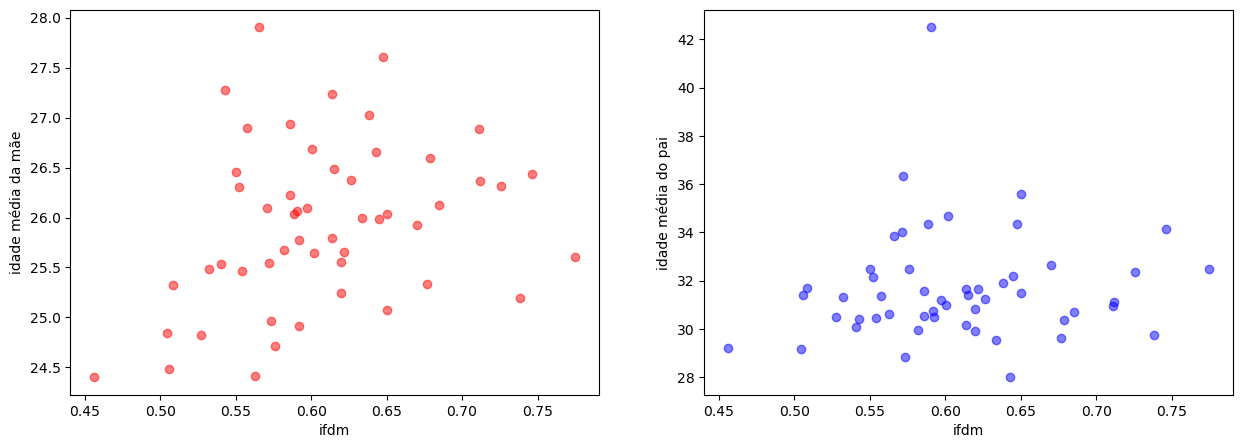

In [347]:
# Gerando um plot das idades em relação ao ifdm

fig = plt.figure(figsize=[15, 5])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(ifdm_mean_idade['ifdm'], ifdm_mean_idade['IDADEMAE'], color='red', alpha=.5)
ax2.scatter(ifdm_mean_idade['ifdm'], ifdm_mean_idade['IDADEPAI'], color='blue', alpha=.5)

ax1.set_xlabel('ifdm')
ax1.set_ylabel('idade média da mãe')

ax2.set_xlabel('ifdm')
ax2.set_ylabel('idade média do pai')

plt.show()

- Como pode-se notar, não parece haver uma correlação sólida entre a idade média da mãe ou do pai e o IFDM. De qualquer forma é perceptível que para um IFDM acima de ~0.6 a idade das mães é superior a 25 anos, mas essa mesma comparação não pode ser replicada para a idade dos pais.

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [350]:
# Obtendo as informações de município e pib

df_pib = df[['municipio', 'pib']]
df_pib.head()

,municipio,pib
0,Alta Floresta D'Oeste,496000
1,Alto Alegre dos Parecis,213410
2,Alto Paraíso,358000
3,Alvorada D'Oeste,204098
4,Ariquemes,2579830


In [351]:
# Renomeando as colunas 

df_pib.columns = ['munResNome', 'pib']

In [352]:
df_pib.head(2)

,munResNome,pib
0,Alta Floresta D'Oeste,496000
1,Alto Alegre dos Parecis,213410


In [353]:
# Mesclando o dataframe ao sinasc_raw

df_pib_merged = df_pib.merge(sinasc_raw, on='munResNome', how='inner')

In [354]:
df_pib_merged.head(3)

,munResNome,pib,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
0,Alta Floresta D'Oeste,496000,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,...,0,5,1,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,Alta Floresta D'Oeste,496000,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,...,1,5,2,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,Alta Floresta D'Oeste,496000,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,...,1,5,3,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [355]:
# Elaborando um dataframe com algumas variáveis

df_pib_idade = df_pib_merged[['munResNome', 'pib', 'IDADEMAE', 'IDADEPAI']]
df_pib_idade

,munResNome,pib,IDADEMAE,IDADEPAI
0,Alta Floresta D'Oeste,496000,19,26.0
1,Alta Floresta D'Oeste,496000,29,24.0
2,Alta Floresta D'Oeste,496000,37,32.0
3,Alta Floresta D'Oeste,496000,30,27.0
4,Alta Floresta D'Oeste,496000,33,40.0
...,...,...,...,...
27022,Vilhena,2831175,34,38.0
27023,Vilhena,2831175,34,33.0
27024,Vilhena,2831175,32,35.0
27025,Vilhena,2831175,24,30.0


In [356]:
# Faixas pib pelo método .qcut

pib = pd.qcut(df['pib'], 10)
pib.value_counts()

pib
(52907.999, 77244.5]       6
(1479144.4, 17912070.0]    6
(77244.5, 116656.4]        5
(116656.4, 142828.8]       5
(142828.8, 173139.0]       5
(173139.0, 211115.5]       5
(211115.5, 359200.0]       5
(359200.0, 522400.0]       5
(522400.0, 707400.0]       5
(707400.0, 1479144.4]      5
Name: count, dtype: int64

In [357]:
# Utilizando o .groupby e gerando algumas análises

pib_idade = df_pib_filhos.groupby([pib], observed=False)[['IDADEMAE', 'IDADEPAI']].agg([('média','mean'), 
                                                                                            ('soma', 'sum'), 
                                                                                            ('maximo', 'max'),
                                                                                            ('minimo', 'min')
])

pib_idade = pib_idade.reset_index()

In [358]:
pib_idade

pib   IDADEMAE                      IDADEPAI         \
                                média soma maximo minimo      média   soma   
0     (52907.999, 77244.5]  22.166667  133     29     14  30.800000  154.0   
1      (77244.5, 116656.4]  23.600000  118     30     20  27.400000  137.0   
2     (116656.4, 142828.8]  22.400000  112     30     18  27.200000  136.0   
3     (142828.8, 173139.0]  23.000000  115     31     16  24.666667   74.0   
4     (173139.0, 211115.5]  24.200000  121     30     21  28.000000   56.0   
5     (211115.5, 359200.0]  29.000000  145     37     17  29.000000  116.0   
6     (359200.0, 522400.0]  23.200000  116     31     18  24.250000   97.0   
7     (522400.0, 707400.0]  28.600000  143     40     19  28.800000  144.0   
8    (707400.0, 1479144.4]  23.600000  118     31     18  25.500000  102.0   
9  (1479144.4, 17912070.0]  30.333333  182     34     27  37.800000  189.0   

                 
  maximo minimo  
0   40.0   20.0  
1   41.0   19.0  
2   33.0   23.0  
3   27.0   22.0  
4   29.0   27.0  
5   39.0   21.0  
6   27.0   22.0  
7   39.0   21.0  
8   34.0   20.0  
9   49.0   28.0

In [359]:
# Selecionando apenas a média das idades

pib_mean = df_pib_idade.groupby('pib')[['IDADEMAE', 'IDADEPAI']].mean()
pib_mean = pib_mean.reset_index()
pib_mean.head()

,pib,IDADEMAE,IDADEPAI
0,52908,27.023256,31.888889
1,59779,27.281250,30.392857
2,72084,26.481481,31.395833
3,72089,26.031250,31.500000
4,76756,25.075000,35.600000


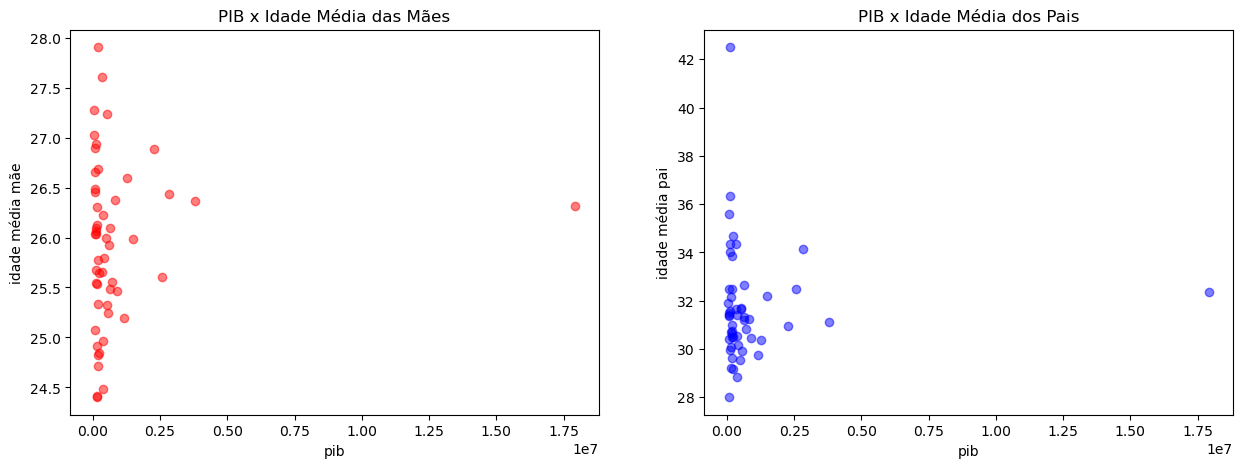

In [360]:
# Gerando uma visualização gráfica

fig = plt.figure(figsize=[15,5])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(pib_mean['pib'], pib_mean['IDADEMAE'], color='red', alpha=0.5)
ax1.set_title('PIB x Idade Média das Mães')
ax1.set_xlabel('pib')
ax1.set_ylabel('idade média mãe')

ax2.scatter(pib_mean['pib'], pib_mean['IDADEPAI'], color='blue', alpha=0.5)
ax2.set_title('PIB x Idade Média dos Pais')
ax2.set_xlabel('pib')
ax2.set_ylabel('idade média pai')

plt.show()

### Insights

Tendo como base as variáveis escolhidas para análise (PIB x idade média da mãe e do pai) não parece haver uma correlação direta entre as mesmas. 

Um ponto que fica claro com a análise do gráfico de dispersão é o fato de que a média da idade dos pais possui um alcance maior em relação a idade das mães, mas esse não é um ponto que estabelece uma correlação com o PIB dos municípios.